# 1. Data Collection

In [1]:
# Importing necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LABELS=['Normal', 'Fraud']

In [2]:
# Read the credit card dataset from the specified CSV file path:

credit_card = pd.read_csv("C:/Users/DELL/Python Demo/creditcard.csv")


# Display the first few rows of the dataset:

credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Exploratory Data Analysis (EDA)

#### Perform Exploratory Data Analysis (EDA):
 - Check data quality: Identify missing values, outliers, and other data inconsistencies.
 - Treat missing values: Handle missing values by imputation or removal.
 - Address outliers: Detect and handle outliers using appropriate techniques.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Get the number of rows and columns in the credit_card DataFrame:

rows, columns = credit_card.shape


# Print the number of rows and columns:

print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 284807
Number of Columns: 31


In [5]:
# Display concise summary information about the credit_card DataFrame:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Calculate the sum of missing values in each column of the credit_card DataFrame:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Check if there are any duplicate rows in the credit_card DataFrame:
credit_card.duplicated().any()

True

In [8]:
# Calculate the number of duplicate rows in the credit_card DataFrame:

credit_card.duplicated().sum()

1081

In [9]:
# Calculate the number of duplicate transactions by subtracting the number of rows before and after removing duplicates:

print(f"Duplicate Transaction:",284807 - 283726)

Duplicate Transaction: 1081


In [10]:
# Get the shape of the credit_card DataFrame:

credit_card.shape

(284807, 31)

In [11]:
# Remove duplicate rows from the credit_card DataFrame and create a new DataFrame:

credit_card_new = credit_card.drop_duplicates()

# Get the shape of the new DataFrame after removing duplicates:

credit_card_new.shape

(283726, 31)

In [12]:
# Retrieve the column names of the credit_card_new DataFrame:

credit_card_new.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
# Check if there are any duplicate rows in the credit_card_new DataFrame:

credit_card_new.duplicated().any()

False

In [14]:
# Count the occurrences of each unique value in the 'Class' column of the credit_card_new DataFrame:

credit_card_new['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

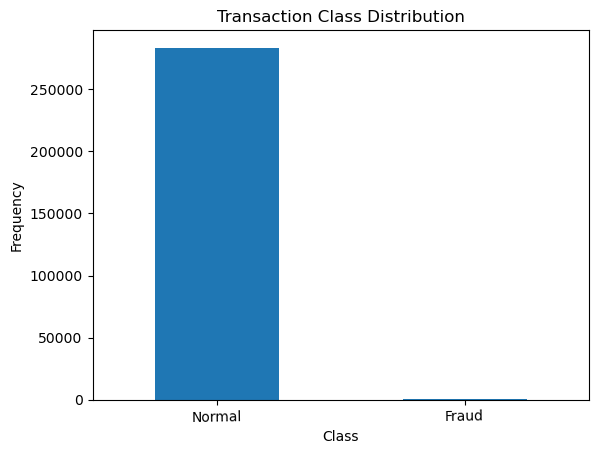

In [15]:
# Plot the distribution of the 'Class' column in the credit_card_new DataFrame as a bar plot:

#credit_card_new['Class'].value_counts().plot(kind = 'bar',rot=True)
count_Classes=pd.value_counts(credit_card_new['Class'], sort=True)
count_Classes.plot(kind= 'bar', rot=True)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

In [16]:
# Assign the counts of fraudulent and legitimate transactions to variables:

fraud,legitimate = credit_card_new['Class'].value_counts()

# Print the counts of fraudulent and legitimate transactions:
print(f"Fraud Transactions (Class=0): {legitimate}")
print(f"Legitimate Transactions (Class=1): {fraud}")
# Indicate that the data is imbalanced:
print(f"This is imbalance data")

Fraud Transactions (Class=0): 473
Legitimate Transactions (Class=1): 283253
This is imbalance data


In [17]:
# Calculate the ratio of legitimate transactions to the total number of transactions:

283253/283726

0.9983328986416472

In [18]:
# Calculate the ratio of fraudulent transactions to the total number of transactions:

473/283726

0.001667101358352777

In [19]:
credit_card_new.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# 3. Handling Imbalance Data

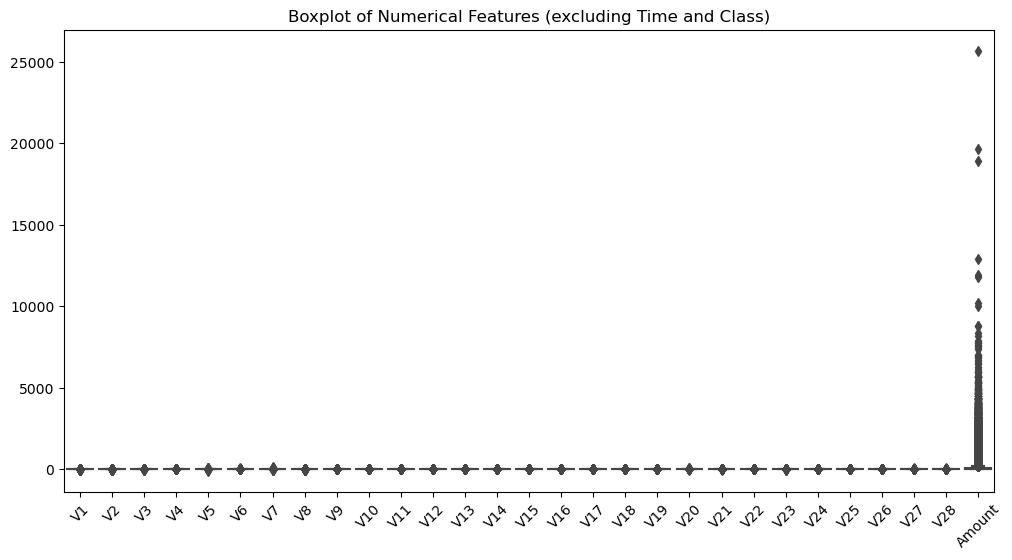

In [20]:
# Visualize outliers for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=credit_card.drop(columns=['Time', 'Class']))
plt.title('Boxplot of Numerical Features (excluding Time and Class)')
plt.xticks(rotation=45)
plt.show()

Y -Dependent Variable X =Independent Variable

In [21]:
# Define X (independent variables) and Y (dependent variable)
# Y represents the 'Class' column (dependent variable)
# X represents all columns except the 'Class' column (independent variables)
X = credit_card_new.drop('Class', axis=1)  # Independent variables
Y = credit_card_new['Class']  # Dependent variable

In [22]:
# Import the SMOTE (Synthetic Minority Over-sampling Technique) module from the imbalanced-learn library

from imblearn.over_sampling import SMOTE

In [23]:
# Initialize SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset

smote = SMOTE(random_state=42)


# Resample the dataset using SMOTE

x_smote, y_smote = smote.fit_resample(X, Y)

In [24]:
x_smote.shape

(566506, 30)

In [25]:
y_smote.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [26]:
from collections import Counter
print("Original dataset shape", Counter(Y))
print("Resample dataset shape", Counter(y_smote))

Original dataset shape Counter({0: 283253, 1: 473})
Resample dataset shape Counter({0: 283253, 1: 283253})


# Data Visualization

In [27]:
fraud_data = credit_card_new[credit_card_new['Class']==1]
legitimate_data = credit_card_new[credit_card_new['Class']==0]

<Axes: ylabel='Frequency'>

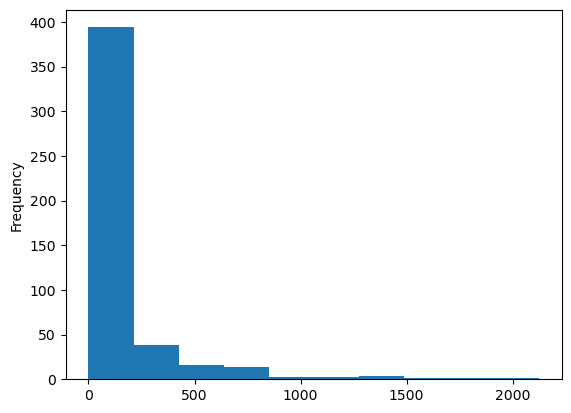

In [28]:
fraud_data['Amount'].plot(kind='hist')

<Axes: ylabel='Frequency'>

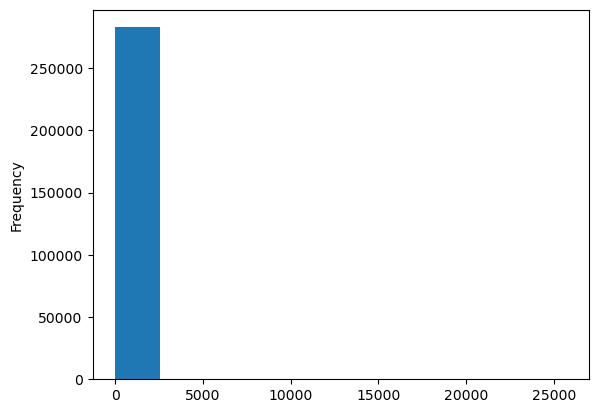

In [29]:
legitimate_data['Amount'].plot(kind='hist')

<Axes: >

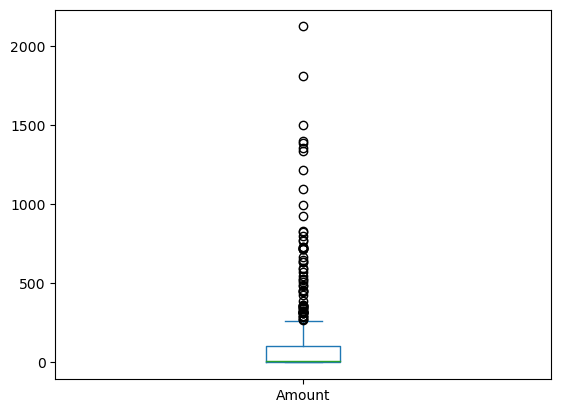

In [30]:
fraud_data['Amount'].plot(kind='box')

<Axes: >

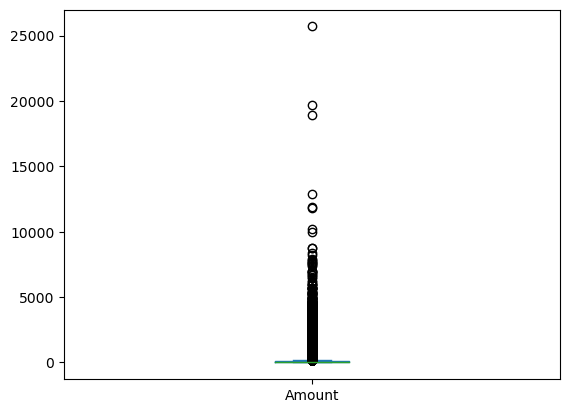

In [31]:
legitimate_data['Amount'].plot(kind='box')

# Correrelation Matrix in Imbalanced Data

In [32]:
# Calculate the correlation matrix for the imbalanced dataset
corr_imbalanced = credit_card.corr()
corr_imbalanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
V9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


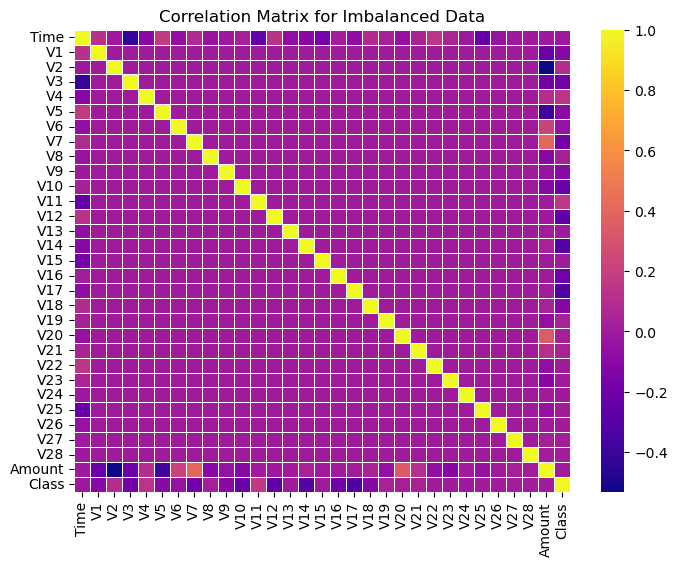

In [33]:
# Calculate the correlation matrix for the imbalanced dataset
corr_imbalanced = credit_card.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_imbalanced, annot=False, cmap="plasma", linewidths=0.5)
plt.title("Correlation Matrix for Imbalanced Data")
plt.show()

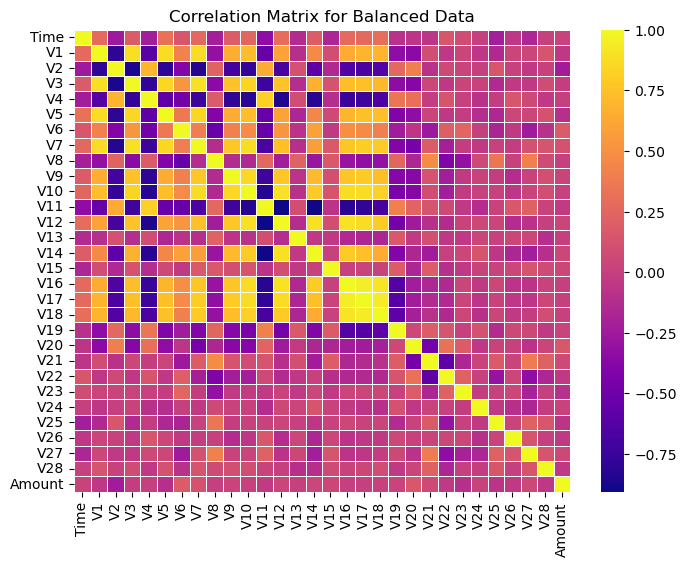

In [34]:
# Calculate the correlation matrix for the balanced dataset
corr_balanced = x_smote.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_balanced, annot=False, cmap="plasma", linewidths=0.5)
plt.title("Correlation Matrix for Balanced Data")
plt.show()

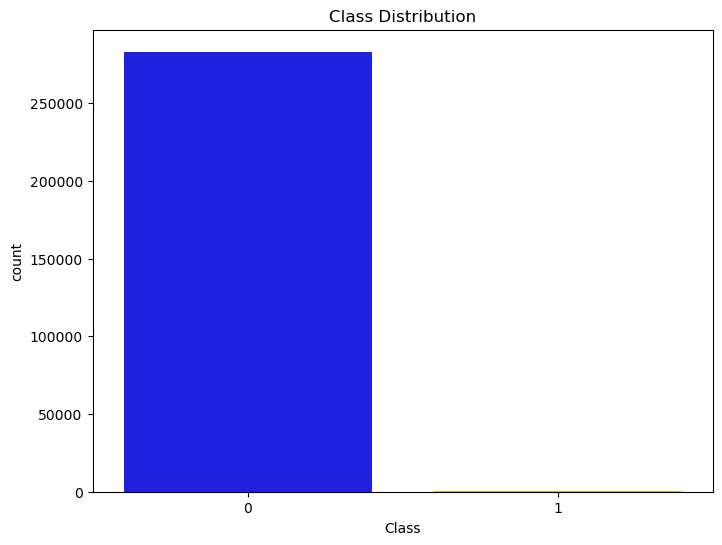

In [35]:
# Define a custom color palette
custom_palette = sns.color_palette(["blue", "gold"])

# Plot the count of each class using seaborn countplot
plt.figure(figsize=(8,6))
sns.countplot(x="Class", data=credit_card_new, palette=custom_palette)
plt.title("Class Distribution")
plt.show()

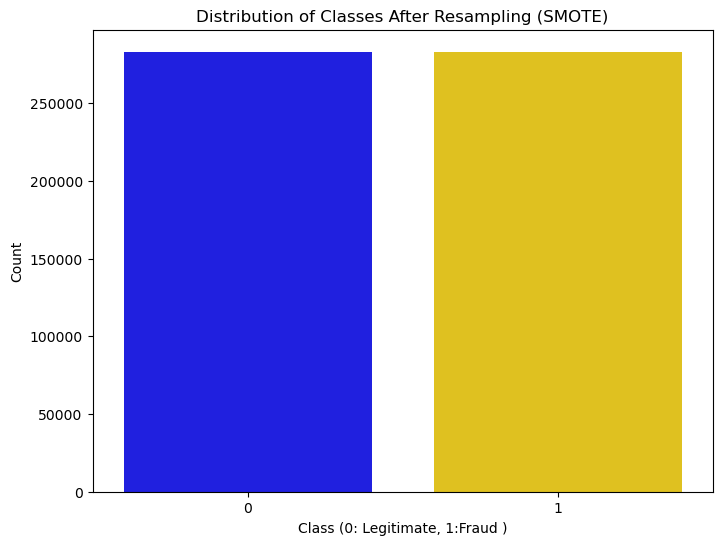

In [36]:
# Define a custom color palette
custom_palette = sns.color_palette(["blue", "gold"])

# Plot the count of each class after resampling using seaborn countplot
plt.figure(figsize=(8,6))
sns.countplot(x=y_smote, palette=custom_palette)
plt.title("Distribution of Classes After Resampling (SMOTE)")
plt.xlabel("Class (0: Legitimate, 1:Fraud )")  # Correcting typo: xlabel instead of xlable
plt.ylabel("Count")  # Correcting typo: ylabel instead of ylable
plt.show()

# 5. Split the dataset into Test and Train

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Step 3: Split the resampled data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

Model Building

# 6. Training a Logistic Regression model and evaluating its performance.

In [39]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression(random_state=42)
logistic_model.fit(X_train,Y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [40]:
Y_pred_logistic = logistic_model.predict(X_test)

#### Classification Performance Metrics
|Accuracy : Measures the proportion of correctly measured instances out of total instances.

|Precision : It is a measure of classifier's exactness.Low precision indicated high number of false negitives.

|Recall (Sensitivity) : It is a measure of classifier's completeness.Low recall indicated high number of false negitives.

| F1 Score : Weighted average of Precision and Recall.

|ROC-AUC : AUROC represents the likelyhood of your model distinguishing observations from two classes.

| Confusion Matrix : Table showing correct predictions and types of incorrect predictions.

## #Classification report

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
classification_report_Logistic= classification_report(Y_test, Y_pred_logistic)
print(classification_report_Logistic)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56463
           1       0.98      0.96      0.97     56839

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



## #Confusion Matrix

In [43]:
confusion_matrix_logistic=confusion_matrix(Y_test, Y_pred_logistic)
confusion_matrix_logistic

array([[55216,  1247],
       [ 2081, 54758]], dtype=int64)

In [44]:
confusion_matrix_df=pd.DataFrame(confusion_matrix_logistic, columns=["Predicted Negative (0)", "Predicted Positive (1)"],
                                 index=["Actual Negative (0)", "Actual Positive (1)"])
confusion_matrix_df

,Predicted Negative (0),Predicted Positive (1)
Actual Negative (0),55216,1247
Actual Positive (1),2081,54758


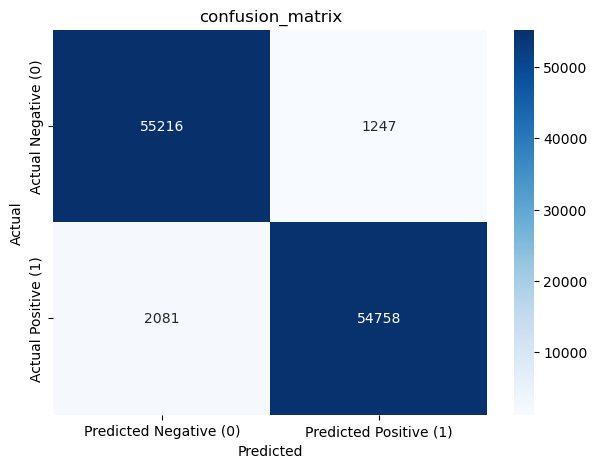

In [45]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title("confusion_matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Customised Prediction

In [46]:
transaction_data = pd.DataFrame(
{
'Time': [16],
'V1': [1.322707269],
'V2': [-0.174040833],
'V3': [0.434555031],
'V4': [0.576037652],
'V5': [-0.8367580467],
'V6': [-0.831083411],
'V7': [-0.264904961],
'V8': [-0.220981943],
'V9': [-1.071424618],
'V10': [0.868558548],
'V11': [-0.64150629],
'V12': [-0.111315775],
'V13': [0.36148541],
'V14': [0.171945122],
'V15': [0.782166532],
'V16': [-1.35587073],
'V17': [-0.216935153],
'V18': [1.271765385],
'V19': [-1.240621935],
'V20': [-0.522950941],
'V21': [-0.284375572],
'V22': [-0.323357411],
'V23': [-0.037709905],
'V24': [0.347150939],
'V25': [0.559639137],
'V26': [-0.280158166],
'V27': [0.042335258],
'V28': [0.0288223],
'Amount': [0],
'class': [0]
})

In [47]:
transaction_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,16,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,-1.071425,...,-0.284376,-0.323357,-0.03771,0.347151,0.559639,-0.280158,0.042335,0.028822,0,0


In [48]:
new_predictions = logistic_model.predict(transaction_data.drop(columns=['class']))

if new_predictions [0] == 1:
    print("Time: 16\nPredict: Fraudulent Transaction")
else:
    print("Time: 16\nPredict: Genuine Transaction")

Time: 16
Predict: Genuine Transaction


#### Generating 28 Random Transactions & Predict the transactions:

In [49]:
transaction_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,16,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,-1.071425,...,-0.284376,-0.323357,-0.03771,0.347151,0.559639,-0.280158,0.042335,0.028822,0,0


In [50]:
# Define the minimum and maximum 'Time' values from your training data

min_time = credit_card_new['Time'].min()
max_time = credit_card_new['Time'].max()

random_transactions = []

# Generate 28 random transactions
for _ in range(28):
    new_transaction = {
        'Time': np.random.uniform(min_time, max_time),
        'Amount': np.random.uniform(0, 500),
        'V1': np.random.uniform (-2, 2),
        'V2': np.random.uniform (-2, 2),
        'V3': np.random.uniform(-2, 2),
        'V4': np.random.uniform (-2, 2),
        'V5': np.random.uniform (-2, 2),
        'V6': np.random.uniform(-2, 2),
        'V7': np.random.uniform(-2, 2),
        'V8': np.random.uniform(-2, 2),
        'V9': np.random.uniform(-2, 2),
        'V10': np.random.uniform(-2, 2),
        'V11': np.random.uniform(-2, 2),
        'V12': np.random.uniform(-2, 2),
        'V13': np.random.uniform(-2, 2),
        'V14': np.random.uniform(-2, 2),
        'V15': np.random.uniform (-2, 2),
        'V16': np.random.uniform (-2, 2),
        'V17': np.random.uniform(-2, 2),
        'V18': np.random.uniform (-2, 2),
        'V19': np.random.uniform(-2, 2),
        'V20': np.random.uniform(-2, 2),
        'V21': np.random.uniform (-2, 2),
        'V22': np.random.uniform(-2, 2),
        'V23': np.random.uniform(-2, 2),
        'V24': np.random.uniform(-2, 2),
        'V25': np.random.uniform (-2, 2),
        'V26': np.random.uniform(-2, 2),
        'V27': np.random.uniform (-2, 2),
        'V28': np.random.uniform(-2, 2),
    }
    random_transactions.append(new_transaction)

random_data = pd.DataFrame(random_transactions, columns=X_train.columns)
random_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,3332.105048,-1.767911,-1.706964,-0.420068,-1.812656,-0.996798,1.485985,-0.998989,-0.187231,0.757976,...,0.768094,1.800407,-1.104405,-1.947244,0.019178,1.573811,0.584608,0.307783,-1.613488,87.322317
1,7947.048095,0.499557,-1.425698,1.758003,0.569106,0.668708,0.376495,1.525554,0.359032,-0.920524,...,1.402425,-1.144885,0.269806,-0.603112,-1.419072,0.975875,-1.575602,-1.333160,-0.824367,246.291485
2,149356.117016,-0.952400,-0.985663,1.063365,0.568095,-0.304077,0.545922,0.856808,0.552976,-1.654364,...,-0.213470,-0.504406,-0.995729,-0.223430,-0.282274,0.328228,-1.511854,0.159218,-1.320519,99.129850
3,163881.338672,-1.538917,0.262810,1.148585,-0.338426,1.640848,1.423686,-0.031428,0.081618,0.335935,...,0.187247,-1.307589,-0.250817,-0.313247,-1.738323,-1.496510,1.308551,0.444575,1.249476,338.049944
4,168904.806606,0.323686,1.237760,1.935350,1.418053,0.683500,-1.711468,-0.610940,-1.950326,-0.971188,...,-0.101234,-1.411774,0.453556,-0.962705,-1.178691,0.216382,1.999805,-0.275149,-1.238623,216.759057
5,114856.816935,-0.617133,1.163760,-0.414856,-1.585497,0.729051,-1.329703,-1.755224,-1.825520,-1.384447,...,0.132506,0.423936,0.812598,-1.740301,-1.014805,-1.978085,1.723066,1.548113,1.656084,103.157034
6,51746.211408,-0.638829,-0.247268,0.793285,-1.920717,-1.436905,-1.506016,0.303484,-1.461580,-0.706666,...,0.247603,1.934017,1.247492,0.685082,-0.227653,-0.634727,-0.583636,-0.784106,0.502093,32.019003
7,62749.595606,-1.313526,0.452974,-1.892158,0.842223,1.367976,1.228918,-1.623849,1.608917,-0.525273,...,-1.520511,-1.560024,0.628330,-0.917338,0.080146,0.417340,-0.355078,-0.876158,0.353824,432.187543
8,68831.791146,-1.034885,-0.374504,1.703969,-0.992580,1.347935,-1.997889,-1.463050,0.074236,0.176296,...,0.056818,-1.946659,1.635278,-1.020563,0.443987,0.209007,0.141538,0.225566,-0.693519,305.721986
9,96926.775993,-1.276634,-1.187505,0.624266,0.229788,1.357878,-1.664329,-0.588709,-1.541249,-0.294663,...,0.768899,-1.341302,-1.450822,1.327600,-1.388690,-0.714441,-0.307777,1.144224,0.111903,135.573043


In [51]:
random_predictions = logistic_model.predict(random_data)

for i, prediction in enumerate(random_predictions):
    if prediction == 0:
        print(f"Transaction {i + 1}: Genuine Transaction")
    else:
        print(f"Transaction {i + 1}: Fraudulent Transaction")

Transaction 1: Genuine Transaction
Transaction 2: Genuine Transaction
Transaction 3: Genuine Transaction
Transaction 4: Genuine Transaction
Transaction 5: Genuine Transaction
Transaction 6: Genuine Transaction
Transaction 7: Genuine Transaction
Transaction 8: Fraudulent Transaction
Transaction 9: Genuine Transaction
Transaction 10: Genuine Transaction
Transaction 11: Genuine Transaction
Transaction 12: Genuine Transaction
Transaction 13: Genuine Transaction
Transaction 14: Genuine Transaction
Transaction 15: Fraudulent Transaction
Transaction 16: Genuine Transaction
Transaction 17: Genuine Transaction
Transaction 18: Genuine Transaction
Transaction 19: Genuine Transaction
Transaction 20: Genuine Transaction
Transaction 21: Genuine Transaction
Transaction 22: Genuine Transaction
Transaction 23: Genuine Transaction
Transaction 24: Genuine Transaction
Transaction 25: Genuine Transaction
Transaction 26: Genuine Transaction
Transaction 27: Genuine Transaction
Transaction 28: Genuine Transac

#### ROC-AUC Curve:

In [52]:
from sklearn.metrics import roc_curve, auc
y_scores = logistic_model.predict_proba(X_test) [:, 1]
y_scores

array([0.9891074 , 0.026841  , 0.00283311, ..., 1.        , 0.00132853,
       0.04002586])

In [53]:
logistic_model.predict_proba(X_test)

array([[1.08925992e-02, 9.89107401e-01],
       [9.73158999e-01, 2.68410015e-02],
       [9.97166893e-01, 2.83310738e-03],
       ...,
       [5.29971622e-11, 1.00000000e+00],
       [9.98671466e-01, 1.32853403e-03],
       [9.59974136e-01, 4.00258637e-02]])

In [54]:
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

In [55]:
fpr

array([0.00000000e+00, 7.08428528e-05, 7.08428528e-05, ...,
       7.64022457e-01, 7.64022457e-01, 1.00000000e+00])

In [56]:
tpr

array([0.        , 0.43257271, 0.44692905, ..., 0.99998241, 1.        ,
       1.        ])

In [57]:
thresholds

array([           inf, 1.00000000e+00, 1.00000000e+00, ...,
       3.64013830e-03, 3.63931315e-03, 7.47076575e-08])

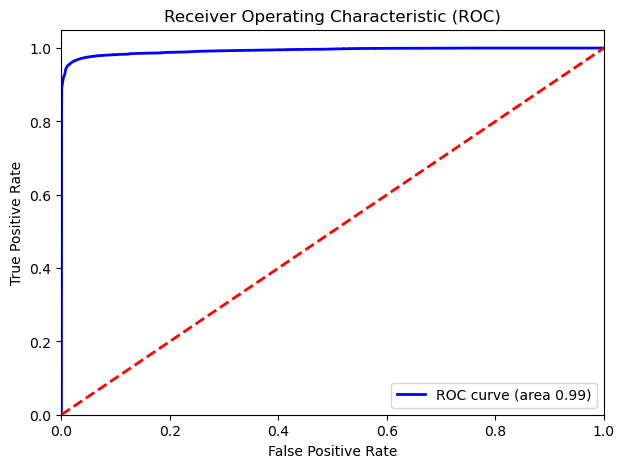

In [58]:
#Calculate ROC-AUC Score and Plot ROC Curve
from sklearn.metrics import roc_curve, auc
y_scores = logistic_model.predict_proba(X_test) [:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area %0.2f)'% roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()